In [52]:
import numpy as np
import matplotlib.pyplot as plt
from mp_api.client import MPRester
from lmapr1492 import plot_brillouin_zone, get_plot_bs
from pymatgen.phonon.plotter import PhononBSPlotter

In [53]:
mp_key = "nbKtMcNjVctWQexVKEJTiT489Bo6oYrr"
mp_id = "mp-11869"

In [54]:
#Récupération de la structure des bandes
with MPRester(mp_key) as m:
    ph_band_struct = m.get_phonon_bandstructure_by_material_id(mp_id)

Retrieving PhononBSDOSDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

In [55]:
#Zone de Brillouin
plot_brillouin_zone(ph_band_struct.structure)

In [56]:
#Récupération des données
data = PhononBSPlotter(ph_band_struct).bs_plot_data()

#Structure des bandes de phonon
fig_ph_bs = get_plot_bs(ph_band_struct)
fig_ph_bs.update_yaxes(rangemode="tozero")
fig_ph_bs.show()

## Vitesse du son

La vitesse du son se trouve assez facilement car elle est décrite comme $v_s = \frac{\delta\omega}{\delta k}$ où k est le vecteur d'onde et $\omega = 2\pi f$. Pour obtenir la vitesse du son, il faut donc trouver la pente des branches accoustiques. 
Il reste maintenant à déterminer quelles sont ces branches. Sur le plot ci-dessus, elles correspondent aux branches où la fréquence est nulle au centre de la zone de Brillouin ( $\Gamma$ ). Il y a dès lors 7 branches accoustiques : 2 pour la direction $\Gamma - X$, 3 pour la direction $K - \Gamma$ et 2 pour la direction $\Gamma - L$

### Première branche accoustique correspondant à la bande 2 dans la direction  $\Gamma - X$

In [57]:
v1 = 2*np.pi*np.abs((data['frequency'][0][1][8]-data['frequency'][0][1][0])*(10**12))/((data['distances'][0][8]-data['distances'][0][0])*(10**10))
print("La vitesse du son de la première branche accoustique est", v1, "m/s")

La vitesse du son de la première branche accoustique est 2404.682226849909 m/s


### Deuxième branche accoustique correspondant à la bande 1 dans la direction $K - \Gamma$

In [58]:
v2 = 2*np.pi*np.abs((data['frequency'][3][0][-1]-data['frequency'][3][0][13])*(10**12))/((data['distances'][3][-1]-data['distances'][3][13])*(10**10))
print("La vitesse du son de la deuxième branche accoustique est", v2, "m/s")

La vitesse du son de la deuxième branche accoustique est 2162.4615300645355 m/s


### Troisième branche accoustique correspondant à la bande 3 dans la direction $\Gamma - L$

In [59]:
v3 = 2*np.pi*np.abs((data['frequency'][4][2][6]-data['frequency'][4][2][0])*(10**12))/((data['distances'][4][6]-data['distances'][4][0])*(10**10))
print("La vitesse du son de la troisième branche accoustique est", v3, "m/s")

La vitesse du son de la troisième branche accoustique est 4483.7561736155885 m/s


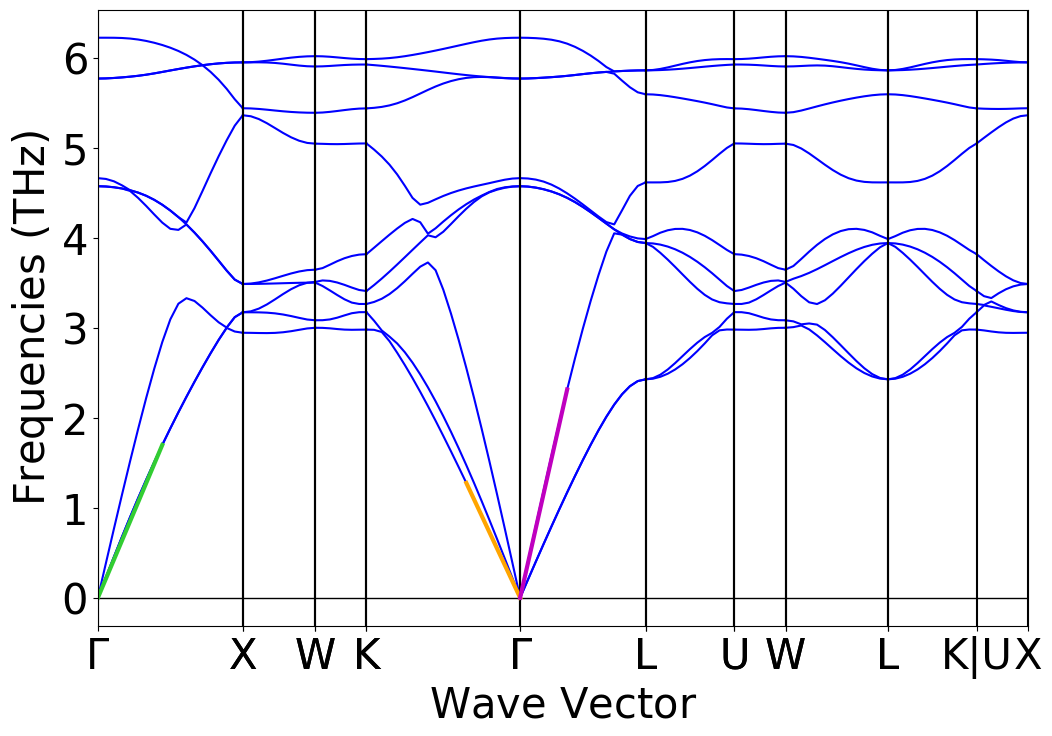

In [60]:
PhononBSPlotter(ph_band_struct).get_plot()

# Bande 2 pour v1
plt.plot([data['distances'][0][0],data['distances'][0][8]],[data['frequency'][0][1][0],data['frequency'][0][1][8]], color='limegreen', lw=3)
# Bande 1 pour v2
plt.plot([data['distances'][3][13],data['distances'][3][-1]],[data['frequency'][3][0][13],data['frequency'][3][0][-1]], color='orange', lw=3)
# Bande 3 pour v3
plt.plot([data['distances'][4][0],data['distances'][4][6]],[data['frequency'][4][2][0],data['frequency'][4][2][6]], color='m', lw=3)